# Initialization

In [3]:
import os
os.getcwd()

'C:\\Users\\AlohaOhana'

# Random pretty

https://seaborn.pydata.org/tutorial/aesthetics.html

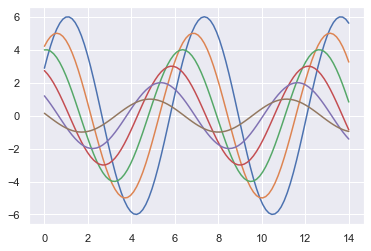

In [33]:
import numpy as np
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sbn.set()
sinplot()

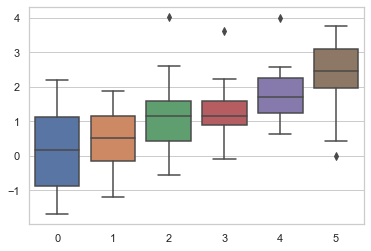

In [34]:
sbn.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sbn.boxplot(data=data);

sbn.set()

f, ax = plt.subplots()
sbn.violinplot(data=data)
sbn.despine(offset=10, trim=True);

# **Scatterplots**

I have intentionally omitted a title for aesthetic display purposes on this profile.

## *Scatterplot with categorical and numerical axes*

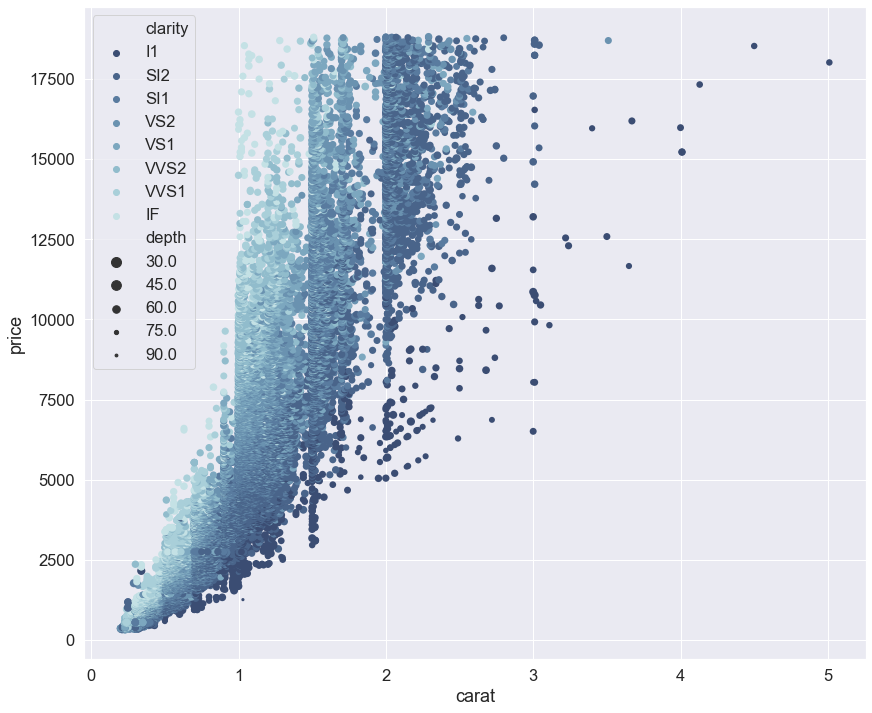

In [30]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set(style="whitegrid")

# Load the example diamond dataset
diamonds = sbn.load_dataset("diamonds")

sbn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(14, 12))
# sbn.despine(f, left=True, bottom=True) # Remove the top and right spines from plot(s).
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
diamond_scatter = sbn.scatterplot(x="carat", y="price",
                  hue="clarity", size="depth",
                  palette="ch:r=-.2,d=.3_r",
                  hue_order=clarity_ranking,
                  sizes=(100, 8), linewidth=0,
                  data=diamonds, ax=ax)
diamond_scatter.figure.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/diamond_scatterplot.png')

## *Scatterplot with continuous hues and sizes*

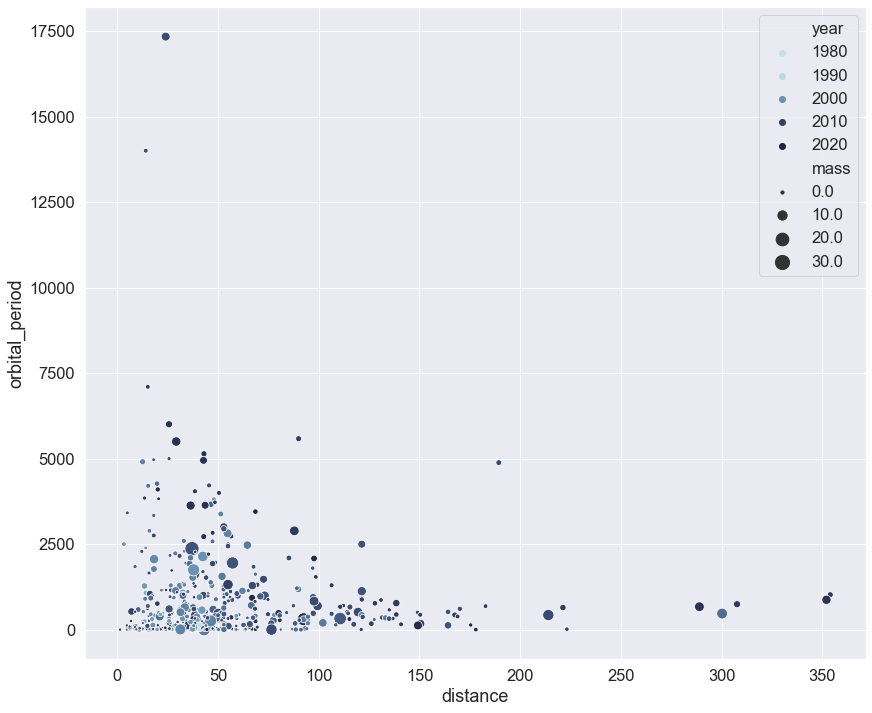

In [41]:
import seaborn as sbn
sbn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

# Load the example iris dataset
planets = sbn.load_dataset("planets")

f, ax = plt.subplots(figsize=(14, 12))

cmap = sbn.cubehelix_palette(rot=-.2, as_cmap=True)
sbn.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

# **Diagonal correlation matrix/heatmap**

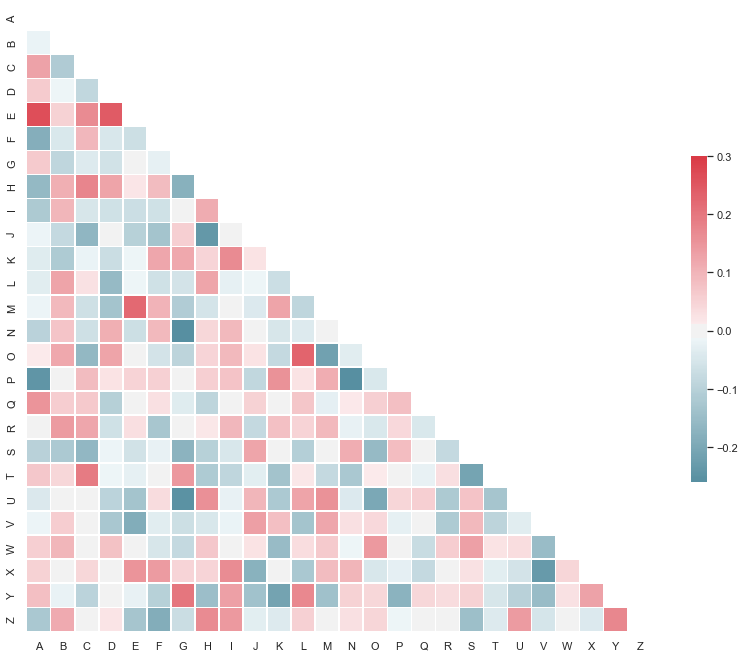

In [44]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(1)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
random_heatmap = sbn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5}) #.set_title('Random Data Heatmap', fontsize=40)
random_heatmap.figure.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/random_heatmap.png')

## *Discovering structure in heatmap data*

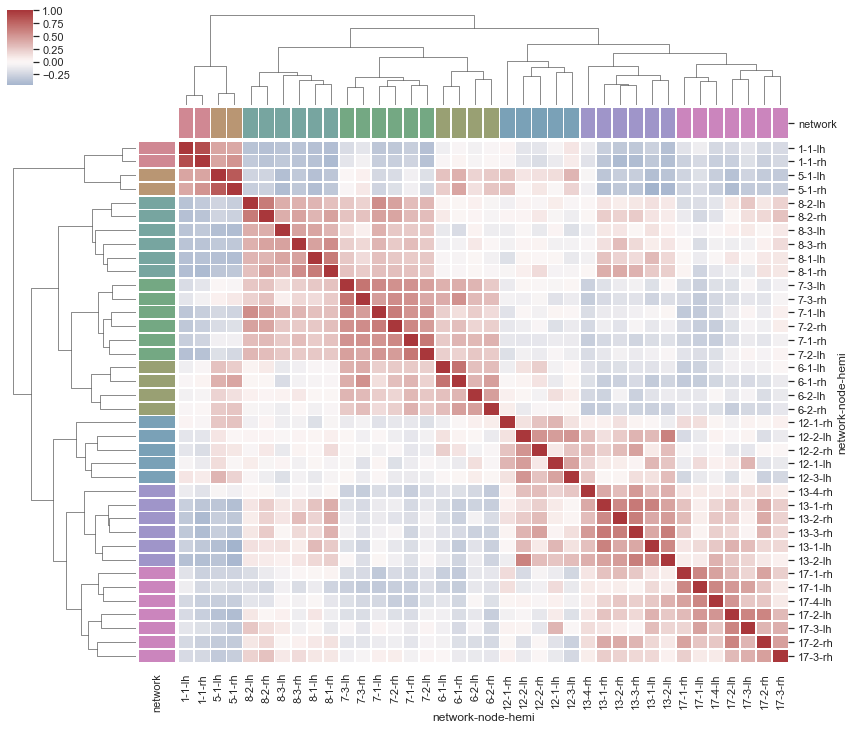

In [45]:
import pandas as pd
import seaborn as sbn
sbn.set()

# Load the brain networks example dataset
df = sbn.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sbn.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sbn.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(14, 12))

# KDE plots

## *Different cubehelix palettes*

Cubehelix was designed by D.A. Green to provide a color mapping that would degrade gracefully to grayscale without losing information. This quality makes Cubehelix useful for continuous color scales in scientific visualizations that might be printed in grayscale at some point.

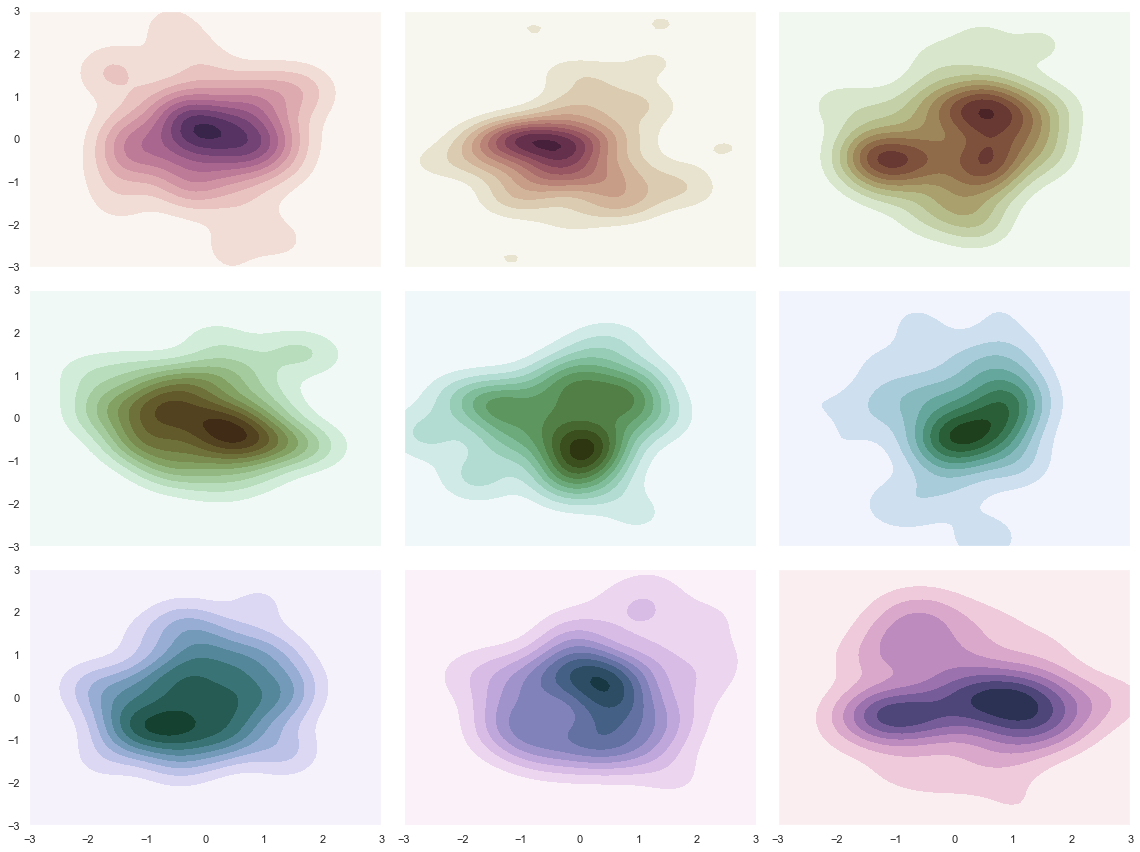

In [48]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sbn.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    test = sbn.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()
test.figure.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/cubehelix_palettes.png')

## *Joint kernel density estimate*

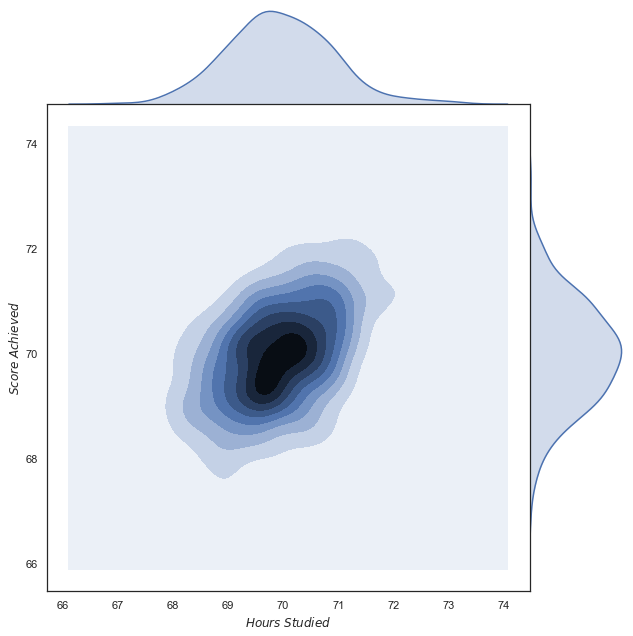

In [59]:
import numpy as np
import pandas as pd
import seaborn as sbn
sbn.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(1)
mean = [70, 70]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 500).T
# x1 = pd.Series(x1, name="$X_1$")
# x2 = pd.Series(x2, name="$X_2$")
x1 = pd.Series(x1, name="$Hours \; Studied$")
x2 = pd.Series(x2, name="$Score \; Achieved$")

# Show the joint distribution using kernel density estimation
g = sbn.jointplot(x1, x2, kind="kde", height=9, space=0) # .set_title('Joint KDE', fontsize=40)
g.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/joint_kde.png')

## *Multiple bivariate KDE plots*

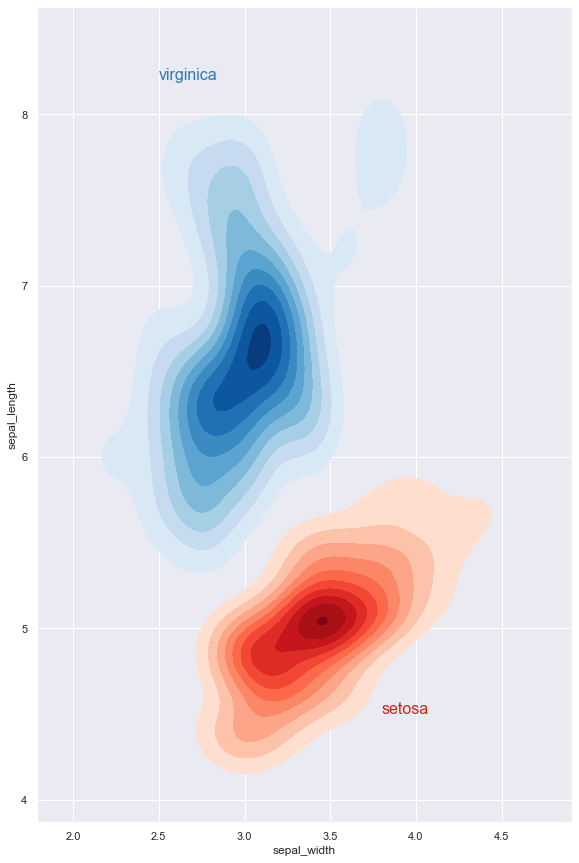

In [60]:
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set(style="darkgrid")
iris = sbn.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect("equal")

# Draw the two density plots
ax = sbn.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sbn.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sbn.color_palette("Reds")[-2]
blue = sbn.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

ax.figure.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/bivariate_kde.png')

# Ridge Plots

Overlapping densities of synthetic data.

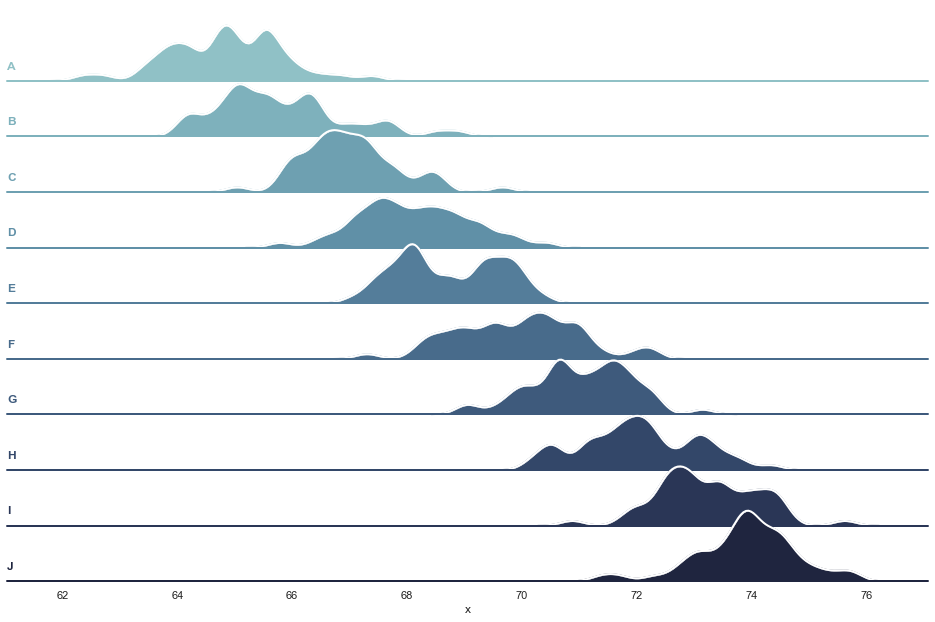

In [54]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1001)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sbn.cubehelix_palette(10, rot=-.25, light=.7)
g = sbn.FacetGrid(df, row="g", hue="g", aspect=15, height=0.9, palette=pal)

# Draw the densities in a few steps
g.map(sbn.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sbn.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

g.savefig('GoogleDrive/andcy7_gdrive_work_laptop/data visualizations/ridge_plot.png')

# Barplots

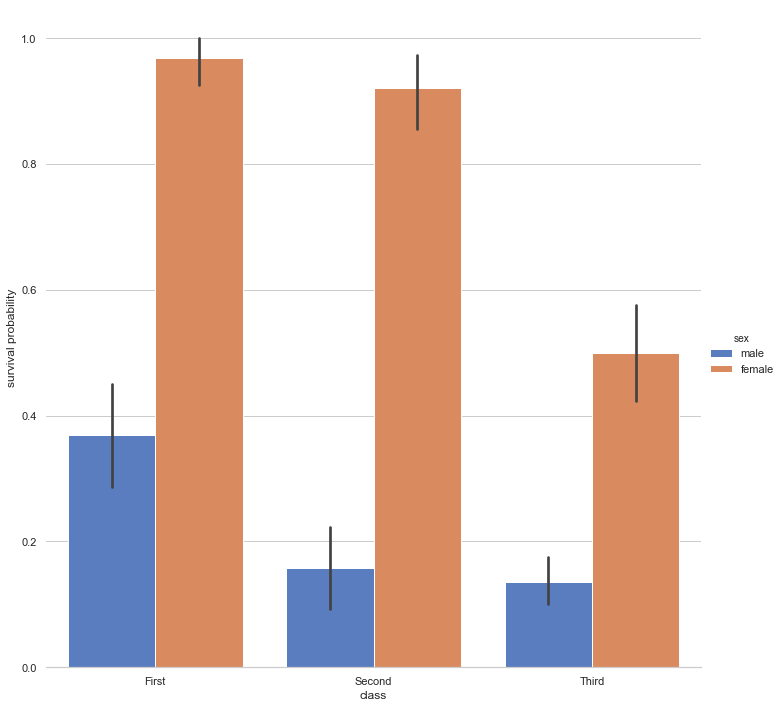

In [71]:
import seaborn as sbn
sbn.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sbn.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sbn.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

# Line Plots

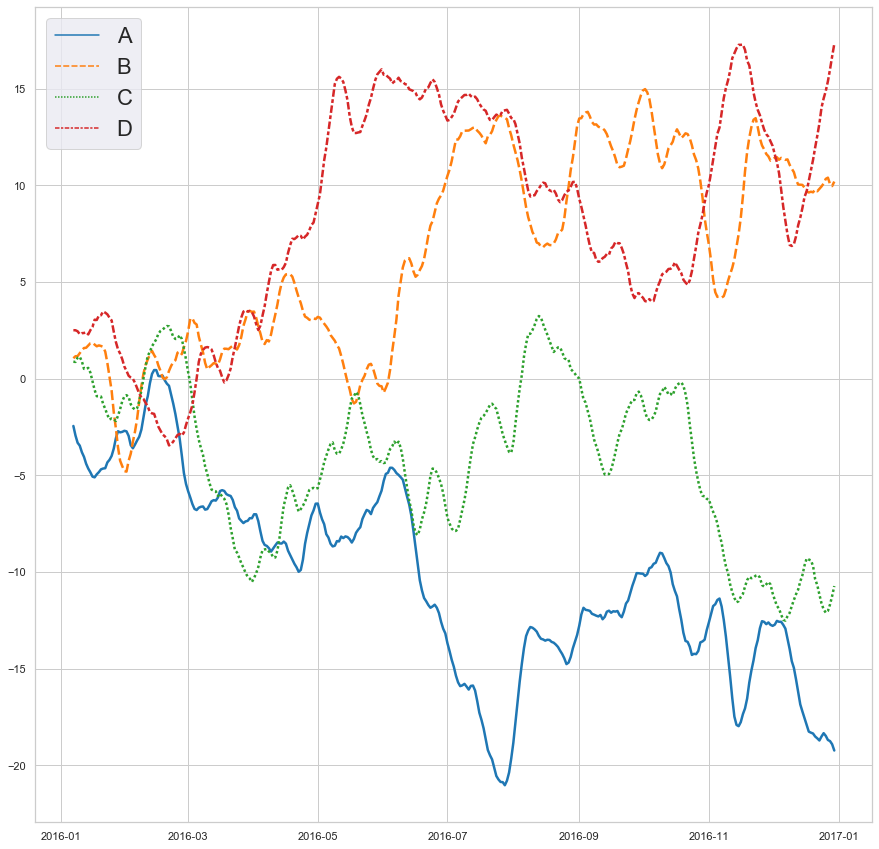

In [105]:
import numpy as np
import pandas as pd
import seaborn as sbn
sbn.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

plt.subplots(figsize=(15, 15), sharex=True, sharey=True)
sbn.set(font_scale =2)  # crazy big
# rc={'axes.labelsize': 320, 'font.size': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32}
# sbn.set(rc=rc)
# plt.rcParams["axes.labelsize"] = 50
# g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
#   ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
ax = sbn.lineplot(data=data, palette="tab10", linewidth=2.5)

# ax.set(xlabel='common xlabel', ylabel='common ylabel', title='some title')

# Hive Plots

In [3]:
from pyveplot import *
import networkx, random

# a network
g = networkx.barabasi_albert_graph(50, 2)

# our hiveplot object
h = Hiveplot( 'short_example.svg')
            # start      end
axis0 = Axis( (200,200), (200,100), stroke="grey")
axis1 = Axis( (200,200), (300,300), stroke="blue")
axis2 = Axis( (200,200), (10,310),  stroke="black")

h.axes = [ axis0, axis1, axis2 ]

# randomly distribute nodes in axes
for n in g.nodes():
    node = Node(n)
    random.choice( h.axes ).add_node( node, random.random() )

for e in g.edges():
    if (e[0] in axis0.nodes) and (e[1] in axis1.nodes):       # edges from axis0 to axis1
        h.connect(axis0, e[0], 45,
                  axis1, e[1], -45,
                  fill='none', stroke_width='0.34', stroke_opacity='0.4',
                  stroke='purple')
    elif (e[0] in axis0.nodes) and (e[1] in axis2.nodes):     # edges from axis0 to axis2
        h.connect(axis0, e[0], -45,
                  axis2, e[1], 45,
                  fill='none', stroke_width='0.34', stroke_opacity='0.4',
                  stroke='red')
    elif (e[0] in axis1.nodes) and (e[1] in axis2.nodes):     # edges from axis1 to axis2
        h.connect(axis1, e[0], 15,
                  axis2, e[1], -15,
                  fill='none', stroke_width='0.34', stroke_opacity='0.4',
                  stroke='magenta')

h.save()


TypeError: __init__() takes 1 positional argument but 2 were given

In [10]:
# pip install pyveplot
# conda install networkx

from pyveplot import Hiveplot, Axis, Node
import networkx as nx
import random

c = ['#e41a1c', '#377eb8', '#4daf4a',
     '#984ea3', '#ff7f00', '#ffff33',
     '#a65628', '#f781bf', '#999999',]

# create hiveplot object
h = Hiveplot('test.svg')
# h = Hiveplot('ba_hiveplot.svg')

# create three axes, spaced at 120 degrees from each other
h.axes = [Axis(start=20, angle=0,
               stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120,
               stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120 + 120,
               stroke=random.choice(c), stroke_width=1.1)
          ]

# create a random Barabasi-Albert network
g = nx.barabasi_albert_graph(100, 2)

# sort nodes by degree
k = list(nx.degree(g))
k.sort(key=lambda tup: tup[1])

# categorize them as high, medium and low degree
hi_deg = [v[0] for v in k if v[1] > 7]
md_deg = [v[0] for v in k if v[1] > 3 and v[1] <= 7]
lo_deg = [v[0] for v in k if v[1] <= 3]

# place these nodes into our three axes
for axis, nodes in zip(h.axes,
                       [hi_deg, md_deg, lo_deg]):
    circle_color = random.choice(c)
    for v in nodes:
        # create node object
        node = Node(radius=g.degree(v),
                    label="node %s k=%s" % (v, g.degree(v)))
        # add it to axis
        axis.add_node(v, node)
        # once it has x, y coordinates, add a circle
        node.add_circle(fill=circle_color, stroke=circle_color,
                        stroke_width=0.1, fill_opacity=0.7)
        if axis.angle < 180:
            orientation = -1
            scale = 0.6
        else:
            orientation = 1
            scale = 0.35
        # also add a label
        node.add_label("node %s k=%s" % (v, g.degree(v)),
                       angle=axis.angle + 90 * orientation,
                       scale=scale)

# iterate through axes, from left to right
for n in range(-1, len(h.axes) - 1):
    curve_color = random.choice(c)
    # draw curves between nodes connected by edges in network
    h.connect_axes(h.axes[n],
                   h.axes[n+1],
                   g.edges,
                   stroke_width=0.5,
                   stroke=curve_color)


TypeError: __init__() takes 1 positional argument but 2 were given

In [9]:
h.save()

TypeError: save() missing 1 required positional argument: 'filename'

In [9]:
Hiveplot

pyveplot.Hiveplot

In [7]:
from pyveplot import *
import networkx, random

# a network
g = networkx.barabasi_albert_graph(50, 2)

# our hiveplot object
h = Hiveplot()
# start end
axis0 = Axis( (200,200), (200,100), stroke="grey")
axis1 = Axis( (200,200), (300,300), stroke="blue")
axis2 = Axis( (200,200), (10,310), stroke="black")

h.axes = [ axis0, axis1, axis2 ]

# randomly distribute nodes in axes
for n in g.nodes():
    node = Node(n)
    random.choice( h.axes ).add_node( node, random.random() )

for e in g.edges():
    if (e[0] in axis0.nodes) and (e[1] in axis1.nodes): # edges from axis0 to axis1
        h.connect(axis0, e[0], 45,
        axis1, e[1], -45,
        fill='none', stroke_width='0.34', stroke_opacity='0.4',
        stroke='purple')
    elif (e[0] in axis0.nodes) and (e[1] in axis2.nodes): # edges from axis0 to axis2
        h.connect(axis0, e[0], -45,
        axis2, e[1], 45,
        fill='none', stroke_width='0.34', stroke_opacity='0.4',
        stroke='red')
    elif (e[0] in axis1.nodes) and (e[1] in axis2.nodes): # edges from axis1 to axis2
        h.connect(axis1, e[0], 15,
        axis2, e[1], -15,
        fill='none', stroke_width='0.34', stroke_opacity='0.4',
        stroke='magenta')

h.save()

TypeError: can't multiply sequence by non-int of type 'float'

In [10]:
from pyveplot import Hiveplot, Axis, Node
import networkx as nx
import random

c = ['#e41a1c', '#377eb8', '#4daf4a',
     '#984ea3', '#ff7f00', '#ffff33',
     '#a65628', '#f781bf', '#999999',]

# create hiveplot object
h = Hiveplot('ba_hiveplot.svg')

# create three axes, spaced at 120 degrees from each other
h.axes = [Axis(start=20, angle=0,
               stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120,
               stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120 + 120,
               stroke=random.choice(c), stroke_width=1.1)
          ]

# create a random Barabasi-Albert network
g = nx.barabasi_albert_graph(100, 2)

# sort nodes by degree
k = list(nx.degree(g))
k.sort(key=lambda tup: tup[1])

# categorize them as high, medium and low degree
hi_deg = [v[0] for v in k if v[1] > 7]
md_deg = [v[0] for v in k if v[1] > 3 and v[1] <= 7]
lo_deg = [v[0] for v in k if v[1] <= 3]

# place these nodes into our three axes
for axis, nodes in zip(h.axes,
                       [hi_deg, md_deg, lo_deg]):
    circle_color = random.choice(c)
    for v in nodes:
        # create node object
        node = Node(radius=g.degree(v),
                    label="node %s k=%s" % (v, g.degree(v)))
        # add it to axis
        axis.add_node(v, node)

    axis.start = random.randint(2, 220)
    axis.angle += random.randint(-90, 90)
    axis.auto_place_nodes()
    
    for v in axis.nodes:
        # once it has x, y coordinates, add a circle
        node = axis.nodes[v]
        node.add_circle(fill=circle_color, stroke=circle_color,
                     stroke_width=0.1, fill_opacity=0.7)
        if axis.angle < 180:
            orientation = -1
            scale = 0.6
        else:
            orientation = 1
            scale = 0.35
        # also add a label
        node.add_label("node %s k=%s" % (v, g.degree(v)),
                    angle=axis.angle + 90 * orientation,
                    scale=scale)
    



        
# iterate through axes, from left to right
for n in range(-1, len(h.axes) - 1):
    curve_color = random.choice(c)
    # draw curves between nodes connected by edges in network
    h.connect_axes(h.axes[n],
                   h.axes[n+1],
                   g.edges,
                   stroke_width=0.5,
                   stroke=curve_color)

# save output
h.save('ba_hiveplot.svg')


TypeError: __init__() takes 1 positional argument but 2 were given